In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment4/Live.csv")

In [ ]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [ ]:
dataset.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [ ]:
X = dataset[['num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys']]

##Elbow Visualization to get the score score of K

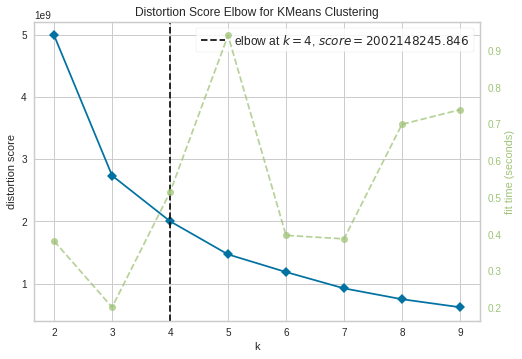

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state = 0)

visualizer = KElbowVisualizer(km, k = (2,10))
visualizer.fit(X)
visualizer.show()
plt.show()

##Silhouette Coefficent Score 0.872

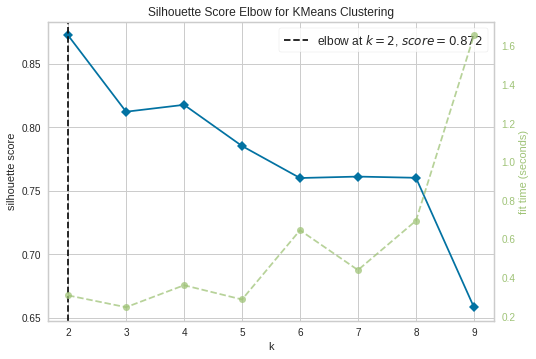

In [ ]:
km = KMeans(random_state = 0)
visualizer_sil = KElbowVisualizer(km, k = (2,10), metric = 'silhouette')
visualizer_sil.fit(X)
visualizer_sil.show()
plt.show()

##Model Build KMeans

In [ ]:
km = KMeans(n_clusters= 2, random_state= 0)
y_pred = km.fit_predict(X)

In [ ]:
dataset['cluster'] = y_pred
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,cluster
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,0


In [ ]:
km.cluster_centers_

array([[2.24142278e+02, 1.22109857e+02, 3.08061948e+01, 2.11227529e+02,
        1.09083804e+01, 1.15298886e+00, 5.56809958e-01, 1.97423650e-01,
        9.63960052e-02],
       [5.22886525e+02, 5.23441844e+03, 4.91624113e+02, 4.02007092e+02,
        1.01921986e+02, 7.97163121e+00, 7.53900709e+00, 2.51063830e+00,
        9.36170213e-01]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


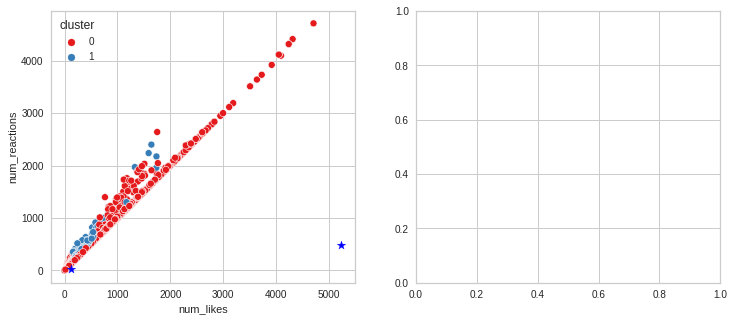

In [ ]:
fig1,(axes)=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot('num_likes', 'num_reactions',  
                data = X,
                hue = dataset['cluster'],
                ax = axes[0],
                palette = 'Set1',
                legend = 'full')
axes[0].scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,2],
                marker = '*', s = 80, c = "blue")

##DB Scan

In [ ]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=50, min_samples=2).fit(X)

In [ ]:
cluster.labels_

array([-1,  0,  0, ...,  0,  0,  0])

In [ ]:
set(cluster.labels_)

In [ ]:
dataset.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4', 'cluster'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


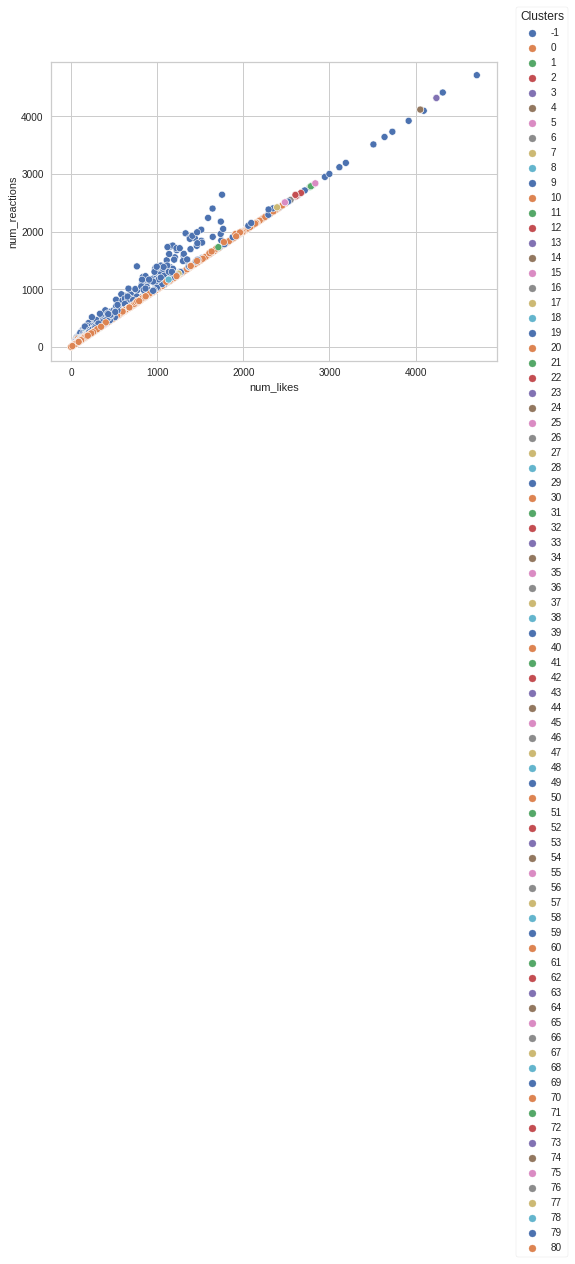

In [ ]:
p = sns.scatterplot('num_likes', 'num_reactions', data = dataset,
                hue = cluster.labels_,
                legend = 'full',
                palette = 'deep')
sns.move_legend(p, 'upper right', bbox_to_anchor = (1.17, 1.2), title = 'Clusters')